In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import h5py
import json
import pickle
import glob
import itertools
import pandas as pd
# from utils.plot_util import *
import socket
import os

# Loading files

In [2]:
hostname = socket.gethostname()
if hostname == 'HAITI' or 'Gorleben':
    DIR = "C:/Users/xin/OneDrive - bwstaff/xin/trelleborg"
    DATASET = "D:/xin/datasets/Trelleborg/2021-01-27-V24/*/*.h5"
if hostname == 'BALI':
    DIR = "/home/xin/projects/trelleborg"
    DATASET = "/storage/xin/datasets/Trelleborg/2021-01-27-V24/*/*.h5"
if hostname == 'LAPTOP-1FOJITEG':
    DIR = "C:/Users/xinch/OneDrive - bwstaff/xin/trelleborg"
    DATASET = "C:/LINHC/VersucheDBs/Trelleborg/2021-01-27-V24/*/*.h5"
DIR = os.path.abspath(DIR)
DATASET = os.path.abspath(DATASET)

file_list = []
for file in glob.glob(DATASET):
    file_list.append(file)
file_list = sorted(file_list)
file_list_LEM1 = [file for file in file_list if 'LEM1' in file]
file_list_LEM1

['C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\2_Phase_A-D\\20210127_Phase_A-D_LEM1.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\3_Phase_B-E\\20210201_3_Phase_B-E_LEM1.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\4_Phase_C-F\\20210202_4_Phase_C-F_LEM1.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\5_Phase_A-D\\20210218_5_Phase_A-D_LEM1.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\7_Phase_C-F\\20210218_7_Phase_C-F_LEM1.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\9_Phase_B-E\\9_Phase_B-E_LEM1.h5']

In [12]:
num = 7

ATTR:
<KeysViewHDF5 ['name_lookup', 'name_rev_lookup']>
Keys:
<KeysViewHDF5 ['S11_LEM2', 'S21_P1_LEM2', 'S21_P2_LEM2', 'S22_LEM2', 'hub1', 'hub2', 'ip1k1', 'ip1k2', 'ip2k1', 'ip2k2', 'k1at', 'k1f', 'k1p', 'k1t', 'k2at', 'k2f', 'k2p', 'k2t', 'phi', 'pos1', 'pos2', 'shub1', 'shub2', 'sk1at', 'sk1f', 'sk1p', 'sk1t', 'sk2at', 'sk2f', 'sk2p', 'sk2t', 'spd1', 'spd2', 'sphi', 'spos1', 'spos2', 'sspd1', 'sspd2', 'stdf', 't', 'tdf']>


<IPython.core.display.Javascript object>


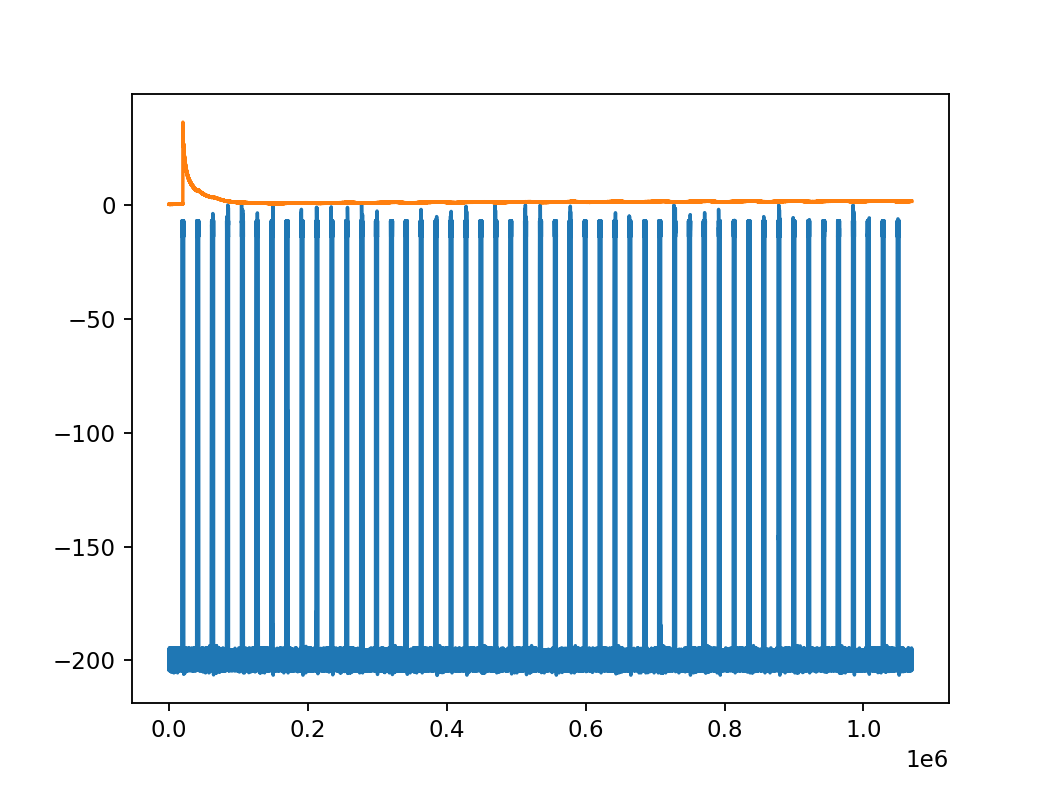

In [13]:
plt.ion()
def avg(x, n=10): return np.convolve(x, np.ones(n), mode="valid")/n

cplot = lambda x, *args, **kwargs: plt.plot(x.real, x.imag, *args, **kwargs)

file = file_list[num]
filename = file.split(os.sep)[-1][:-3]

h51 = h5py.File(file, "r")

print("ATTR:")
print(h51.attrs.keys())

print("Keys:")
print(h51.keys())

# frequency index
fidx = 20

%matplotlib nbagg
plt.plot(h51['spd1'])
plt.plot(h51['ip1k1'])

In [14]:
json.loads(h51.attrs["name_lookup"])

{'Ist-Ablauf-Zeit, ca.': 't',
 'Ist-MG1: Teller-Drehfrequenz [Hz]': 'tdf',
 'Soll-MG1: Teller-Drehfrequenz [Hz]': 'stdf',
 'Ist-MG2: Kammer1-Temp[°C]': 'k1t',
 'Soll-MG2: Kammer1-Temp[°C]': 'sk1t',
 'Ist-MG3: Kammer1-Druck[bar]': 'k1p',
 'Soll-MG3: Kammer1-Druck[bar]': 'sk1p',
 'Ist-MG4: Kammer2-Temp.[°C]': 'k2t',
 'Soll-MG4: Kammer2-Temp.[°C]': 'sk2t',
 'Ist-MG5: Kammer2-Druck[bar]': 'k2p',
 'Soll-MG5: Kammer2-Druck[bar]': 'sk2p',
 'Ist-MG6: Kammer1-Kraft[kN]': 'k1f',
 'Soll-MG6: Kammer1-Kraft[kN]': 'sk1f',
 'Ist-MG7: Kammer2-Kraft[kN]': 'k2f',
 'Soll-MG7: Kammer2-Kraft[kN]': 'sk2f',
 'Ist-MG8: Kammer1-Außentemp.[°C]': 'k1at',
 'Soll-MG8: Kammer1-Außentemp.[°C]': 'sk1at',
 'Ist-MG9: Kammer2-Außentemp.[°C]': 'k2at',
 'Soll-MG9: Kammer2-Außentemp.[°C]': 'sk2at',
 'Ist-MG10: Kammer1-Istpos.[mm]': 'pos1',
 'Soll-MG10: Kammer1-Istpos.[mm]': 'spos1',
 'Ist-MG11: Kammer2-Istpos.[mm]': 'pos2',
 'Soll-MG11: Kammer2-Istpos.[mm]': 'spos2',
 'Ist-MG12: Hub1[mm]': 'hub1',
 'Soll-MG12: Hub1[mm]': '

In [15]:
import pickle
shift_opts_freqs = pickle.load( open( DIR + "/data/shift_opts_freqs/9_Phase_B-E_LEM1.pkl", "rb" ) ) # calculated by grid search

In [16]:
shift_opts_freqs.shape

(121, 50)

## lsa

In [17]:
low = np.where(h51['spd1'][:]>-50)[0]
# skip the lsa in first 10000 points because some wierd patterns in speed, 
# check 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\2_Phase_A-D\\20210127_Phase_A-D_LEM2.h5', 
low = low[low>10000]
pos_low = h51['pos1'][low]
low_sep = np.where(np.diff(low)>3000)[0] # check if 3000 fit for all datasets
pos_low_sep = np.split(pos_low,low_sep+1)
Ls = np.append(low[low_sep],low[-1])
print("timestamps of Ls:")
print (Ls)

Fs = np.append(low[0],low[low_sep+1])
print("timestamps of Fs:")
print (Fs)

print("Durations of lsa:\n",Ls-Fs)

timestamps of Ls:
[  21336   42795   64255   85710  107169  128626  150083  171540  192999
  214457  235915  257372  278831  300288  321744  343200  364659  386117
  407573  429028  450484  471940  493397  514856  536311  557769  579227
  600685  622143  643597  665057  686517  707979  729435  750892  772349
  793809  815265  836723  858181  879636  901091  922551  944011  965472
  986931 1008388 1029844 1051301]
timestamps of Fs:
[  18565   40020   61478   82938  104393  125852  147309  168767  190222
  211682  233140  254598  276055  297514  318972  340427  361882  383342
  404799  426256  447711  469168  490624  512081  533539  554995  576452
  597911  619369  640826  662281  683740  705200  726662  748119  769575
  791033  812493  833949  855406  876865  898320  919774  941234  962694
  984156 1005614 1027072 1048528]
Durations of lsa:
 [2771 2775 2777 2772 2776 2774 2774 2773 2777 2775 2775 2774 2776 2774
 2772 2773 2777 2775 2774 2772 2773 2772 2773 2775 2772 2774 2775 2774
 2774

Durations of lsa for 6_Phase_B-E:

[1294 1379 1395 1378 1395 1470 1558 1611 1682 1764 1850 1920 2007 2115
2205 2328 2437 2541 2637 2670 2644 2627 2553 2473 2446 2358 2313 2264
2192 2143 2084 1974 1884 1814 1748 1656 1623 1603 1613 1584 1559 1527
2037 2193 1977 2029 2077 2158 2238 2345]


## EDA

In [24]:
plt.plot(np.diff(h51['t']))

In [42]:
# time interval in ms
121*2/3

80.66666666666667

In [40]:
np.array(h51['spd1'][10:50000]).max()

-3.3373600511999997

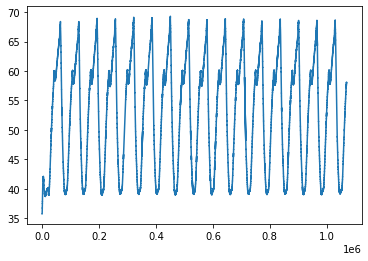

In [10]:
%matplotlib inline
plt.plot(h51['k1t'])

In [ ]:
plt.plot(h51['S21_P1_LEM2']),'.')

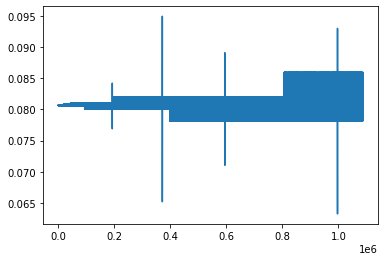

In [48]:
%matplotlib inline
plt.plot(np.diff(h51['t']),'.')

<IPython.core.display.Javascript object>


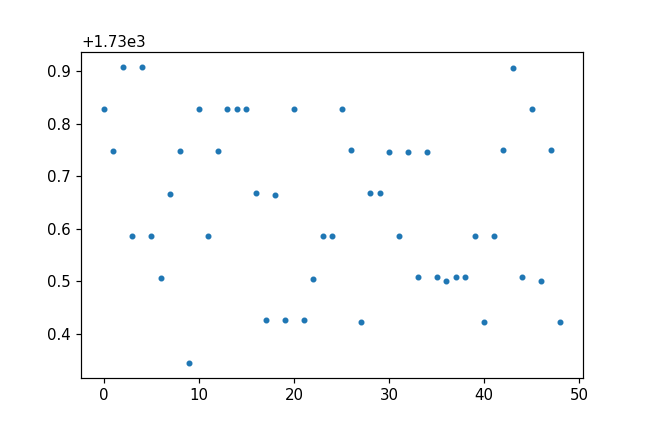

In [75]:
%matplotlib inline
plt.plot(np.diff(h51['t'][Fs]),'.')

<IPython.core.display.Javascript object>


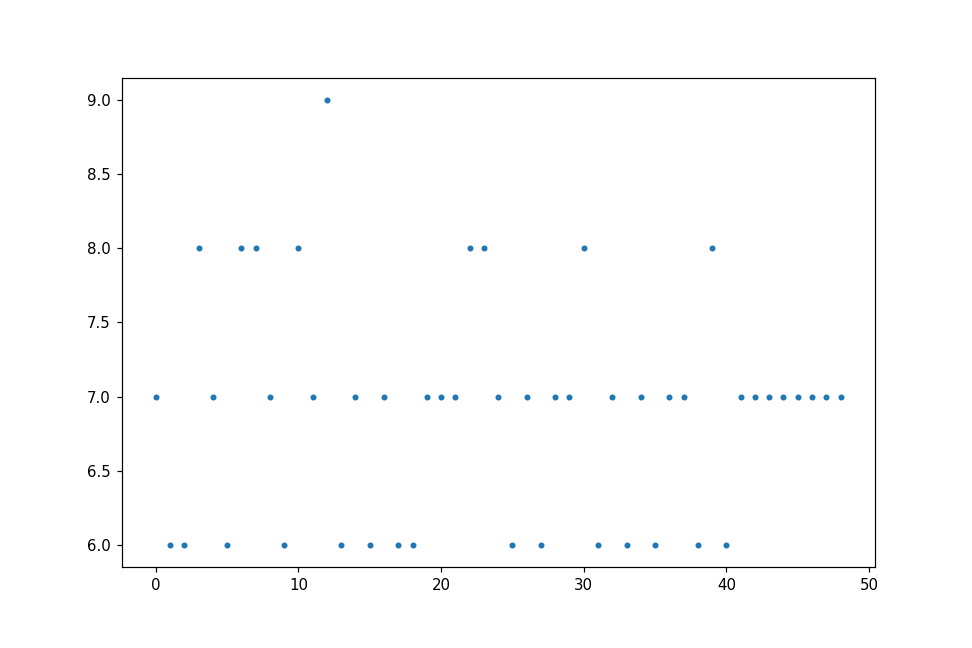

In [76]:
%matplotlib inline
plt.plot(np.diff(shift_opts_freqs[0]),'.')

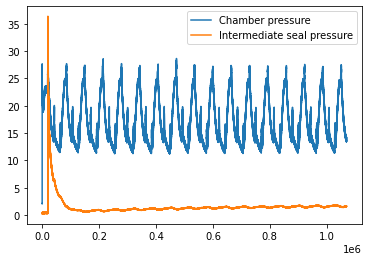

In [14]:
%matplotlib inline
plt.plot(h51['k1p'],label = 'Chamber pressure')
plt.plot(h51['ip1k1'],label = 'Intermediate seal pressure')
plt.legend()

In [ ]:
np.diff(h51['t']).min()

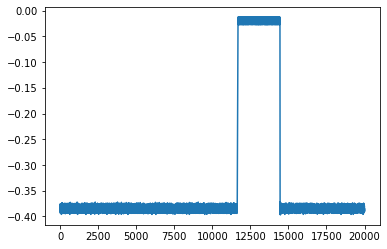

In [5]:
plt.plot(h51['tdf'][:20000])

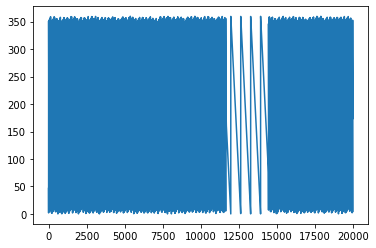

In [8]:
plt.plot(h51['phi'][:20000])

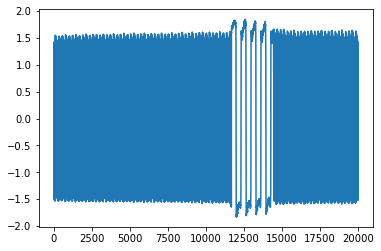

In [6]:
plt.plot(h51['k1f'][:20000])

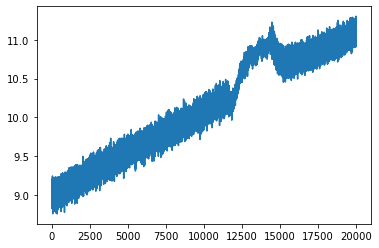

In [7]:
plt.plot(h51['k1p'][:20000])

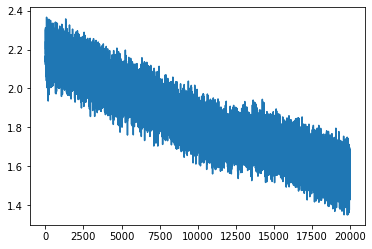

In [10]:
plt.plot(h51['ip1k1'][:20000])

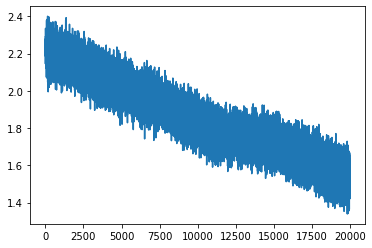

In [11]:
plt.plot(h51['ip2k1'][:20000])

## Plot and save

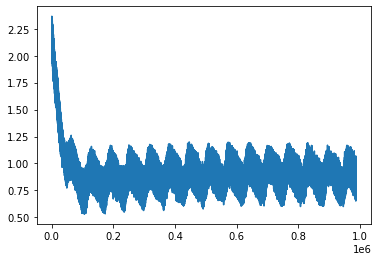

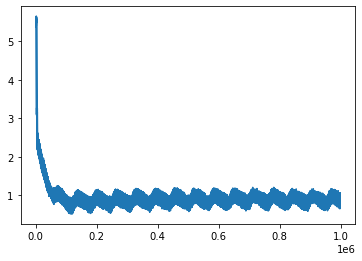

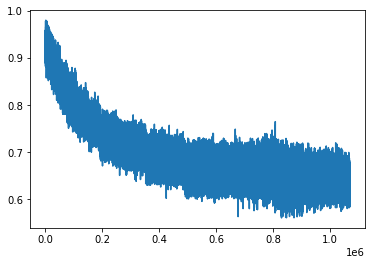

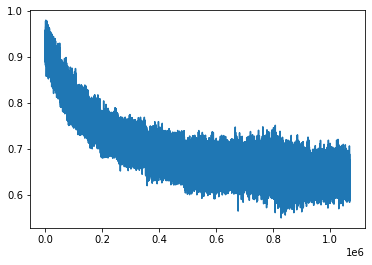

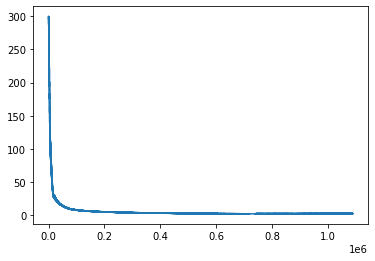

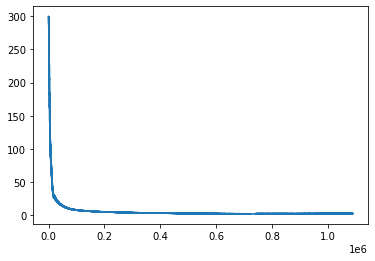

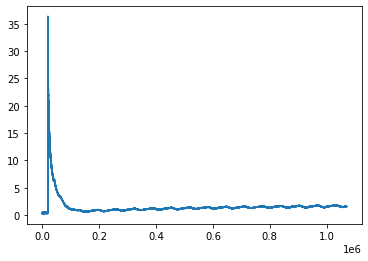

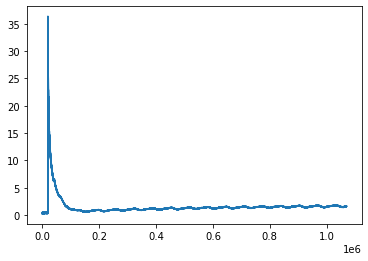

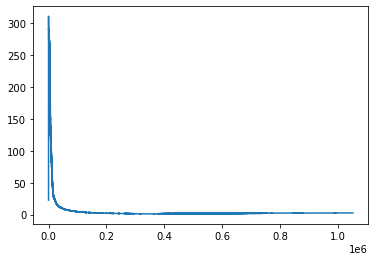

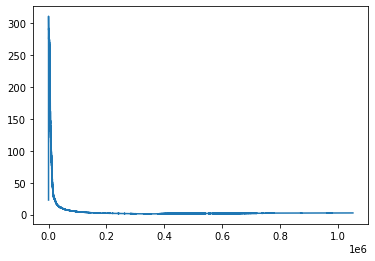

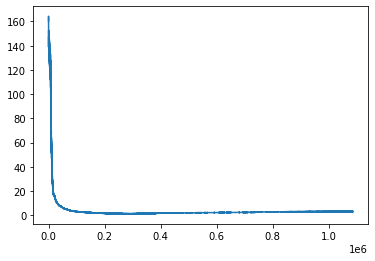

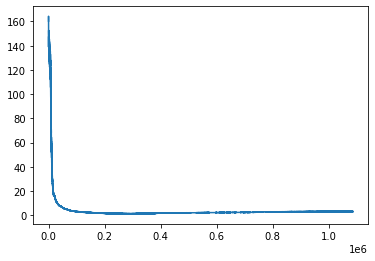

In [5]:
# Plot and save ip1k1
folder = DIR + '/data/pics/ip1k1/'
Path(folder).mkdir(parents=True, exist_ok=True)
for file in file_list:
    filename = file.split(os.sep)[-1][:-3]
    with h5py.File(file, "r") as h51:
        plt.figure()
        plt.plot(h51['ip1k1'])
        plt.savefig(folder + filename,facecolor='w')

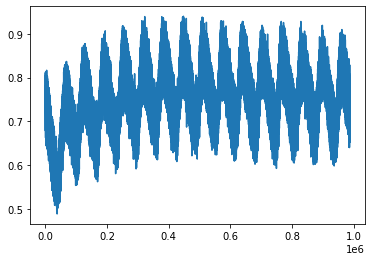

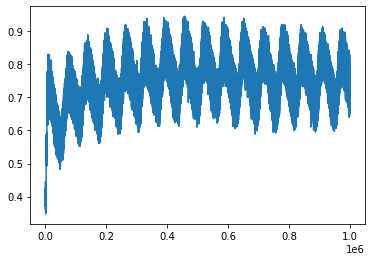

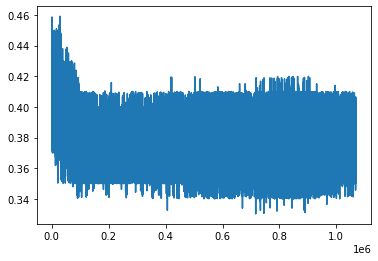

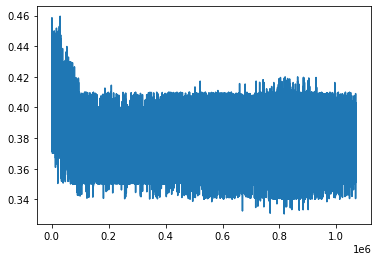

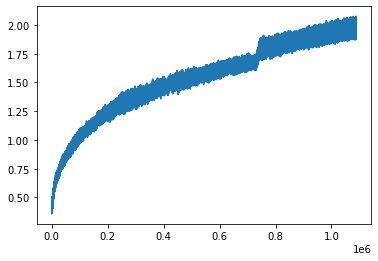

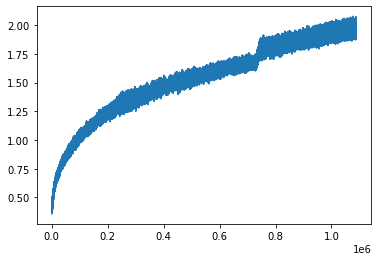

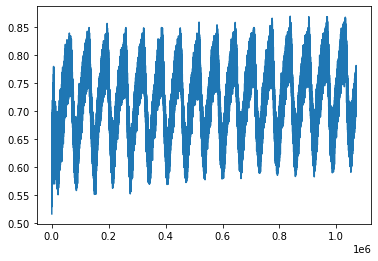

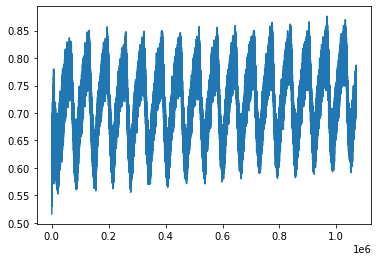

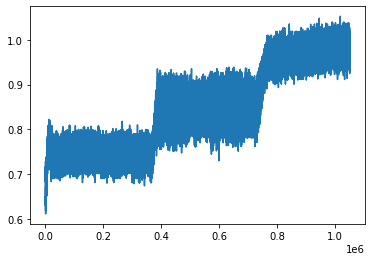

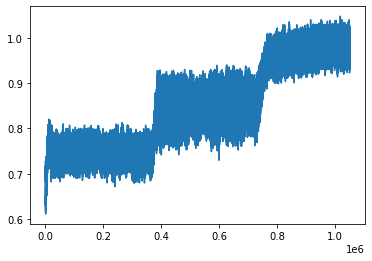

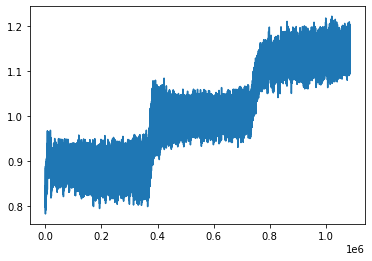

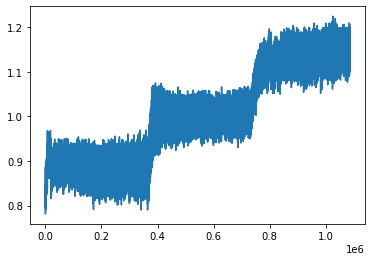

In [8]:
# Plot and save ip1k2
folder = DIR + '/data/pics/ip1k2/'
Path(folder).mkdir(parents=True, exist_ok=True)
for file in file_list:
    filename = file.split(os.sep)[-1][:-3]
    with h5py.File(file, "r") as h51:
        plt.figure()
        plt.plot(h51['ip1k2'])
        plt.savefig(folder + filename,facecolor='w')

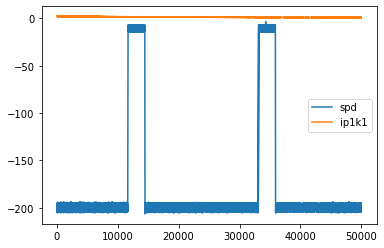

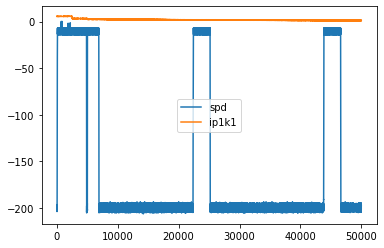

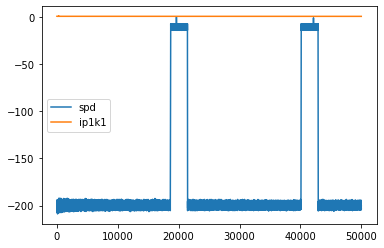

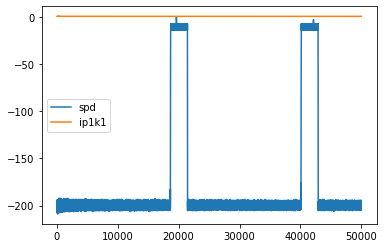

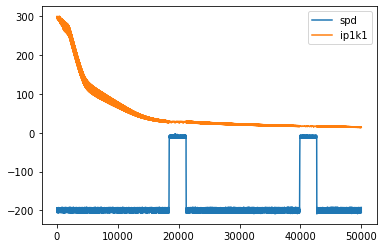

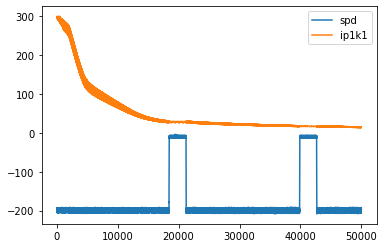

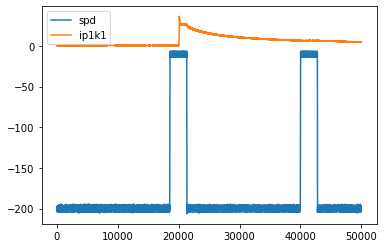

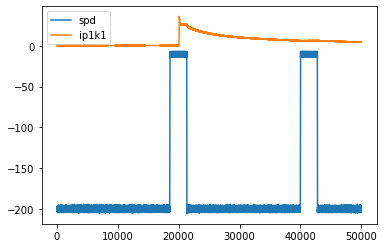

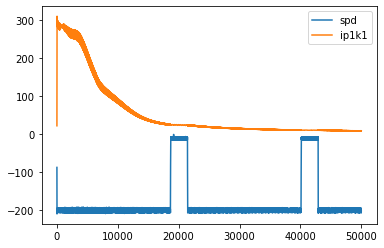

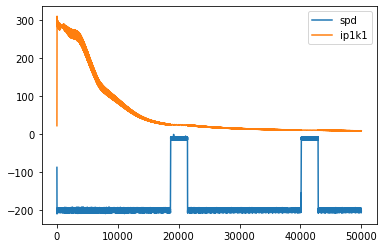

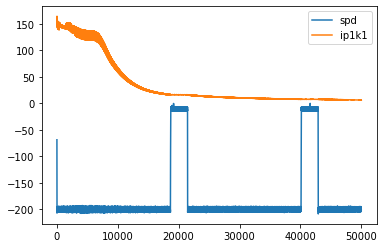

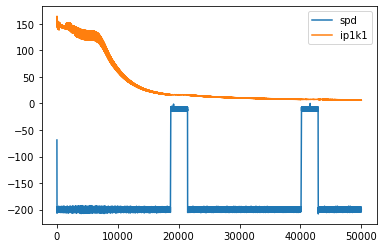

In [3]:
# Plot and save first 50000 spd and ip1k1 points in one figure
folder = DIR + '/data/pics/spd_ip1k1/'
Path(folder).mkdir(parents=True, exist_ok=True)
for file in file_list:
    filename = file.split(os.sep)[-1][:-3]
    with h5py.File(file, "r") as h51:
        plt.figure()
        plt.plot(h51['spd1'][:50000], label = 'spd')
        plt.plot(h51['ip1k1'][:50000], label = 'ip1k1')
        plt.legend()
        plt.savefig(folder + filename,facecolor='w')


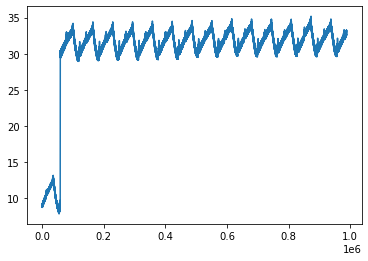

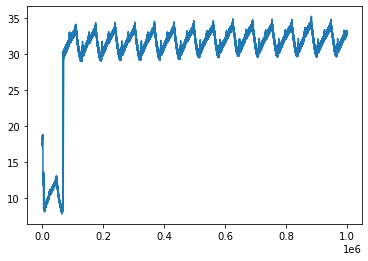

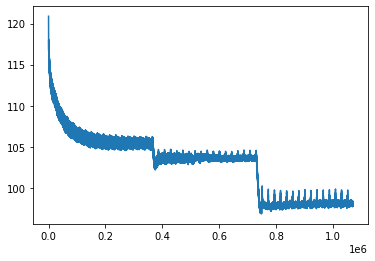

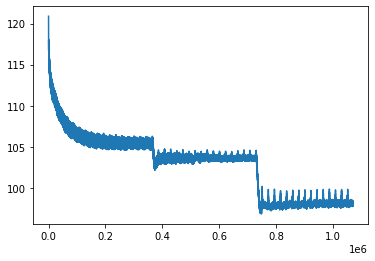

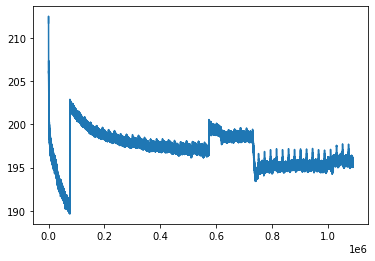

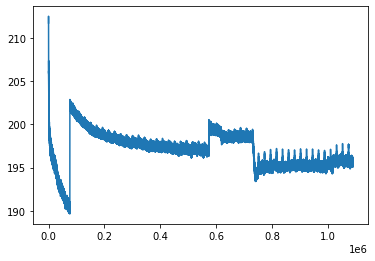

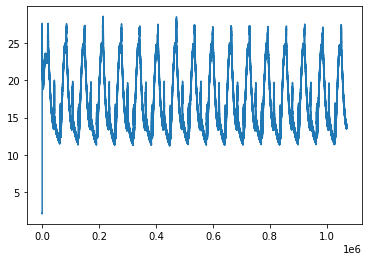

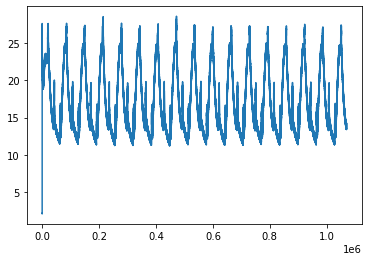

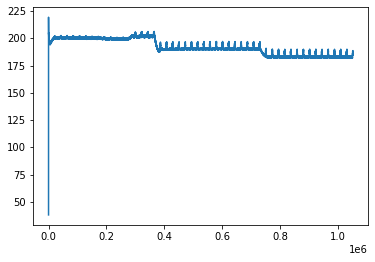

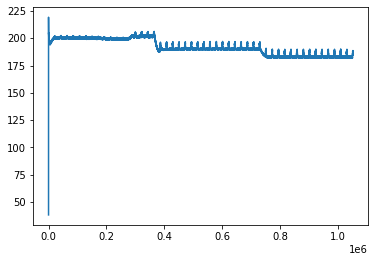

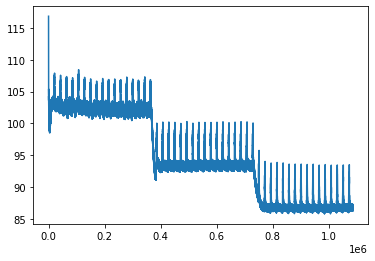

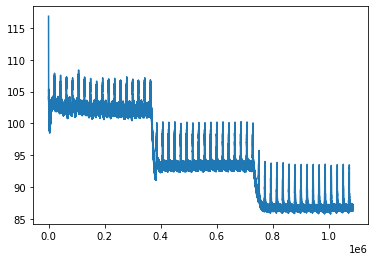

In [6]:
# Plot and save k1p
folder = DIR + '/data/pics/k1p/'
Path(folder).mkdir(parents=True, exist_ok=True)
for file in file_list:
    filename = file.split(os.sep)[-1][:-3]
    with h5py.File(file, "r") as h51:
        plt.figure()
        plt.plot(h51['k1p'])
        plt.savefig(folder + filename,facecolor='w')

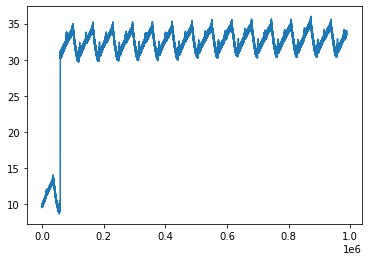

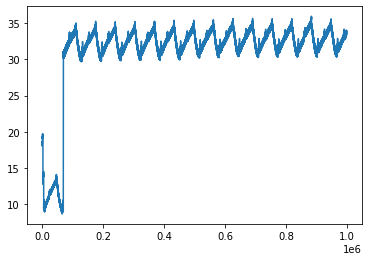

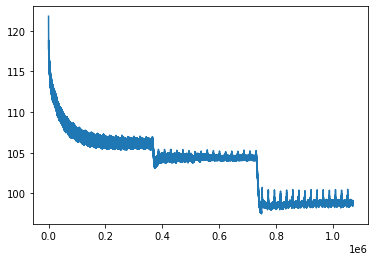

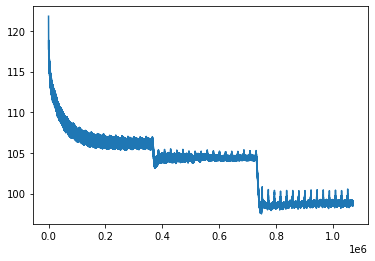

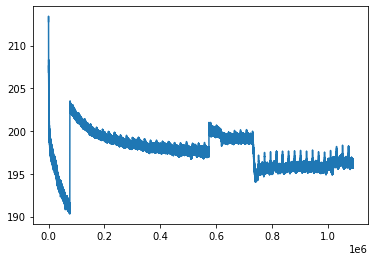

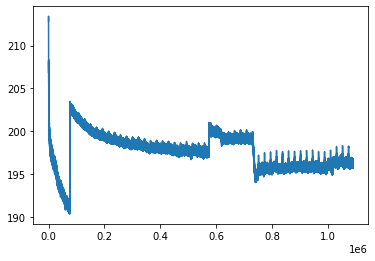

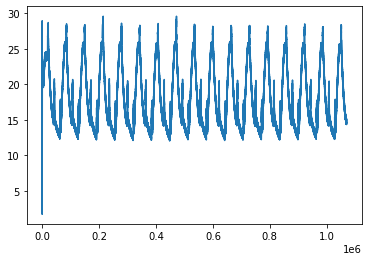

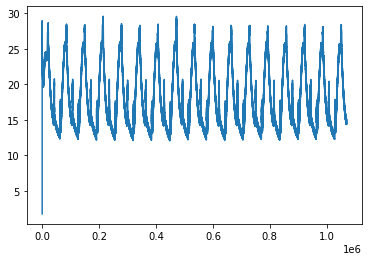

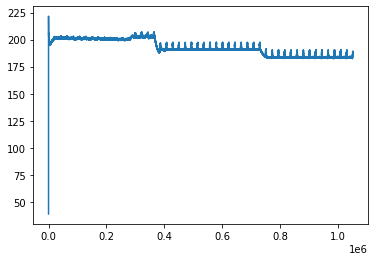

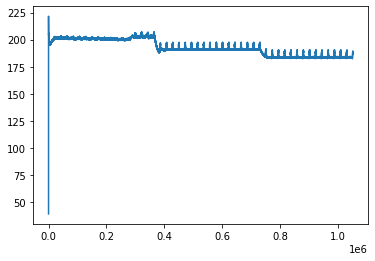

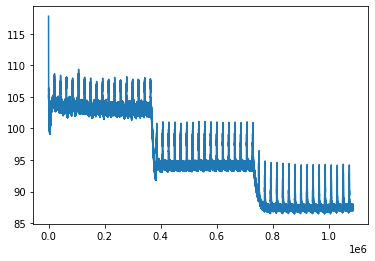

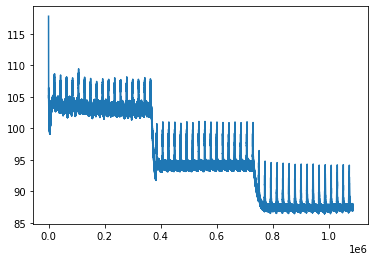

In [7]:
# Plot and save k2p
folder = DIR + '/data/pics/k2p/'
Path(folder).mkdir(parents=True, exist_ok=True)
for file in file_list:
    filename = file.split(os.sep)[-1][:-3]
    with h5py.File(file, "r") as h51:
        plt.figure()
        plt.plot(h51['k2p'])
        plt.savefig(folder + filename,facecolor='w')

In [ ]:
# Plot and save k2p
folder = DIR + '/data/pics/k2p/'
Path(folder).mkdir(parents=True, exist_ok=True)
for file in file_list:
    filename = file.split(os.sep)[-1][:-3]
    with h5py.File(file, "r") as h51:
        plt.figure()
        plt.plot(h51['k2p'])
        plt.savefig(folder + filename,facecolor='w')

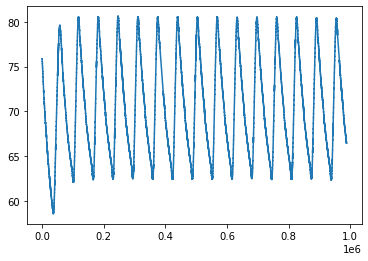

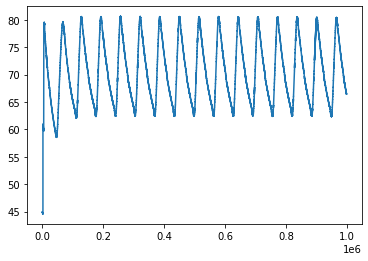

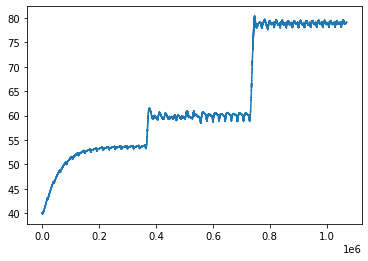

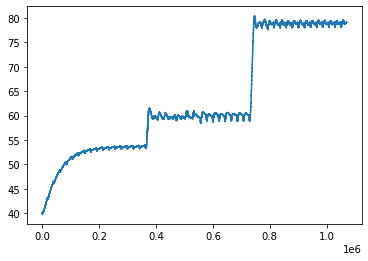

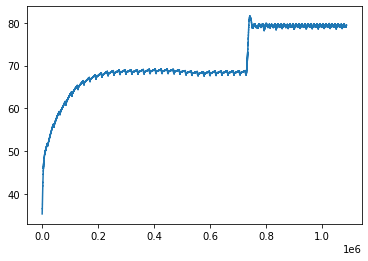

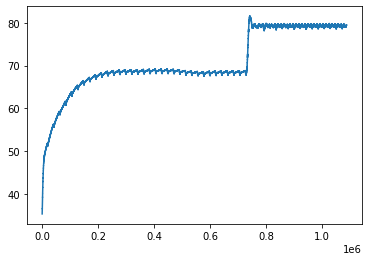

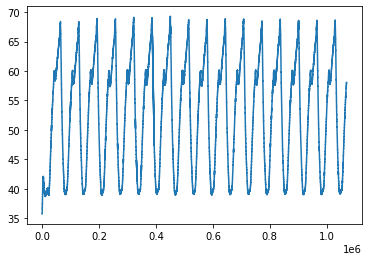

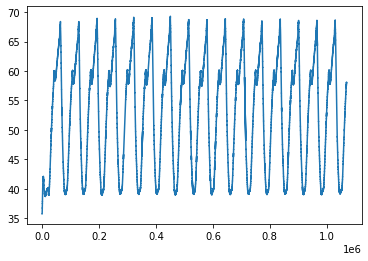

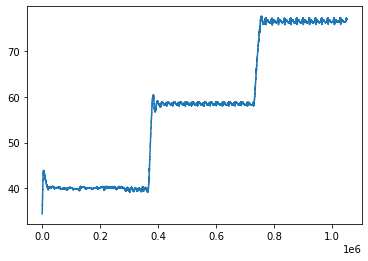

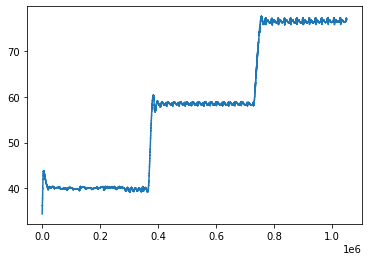

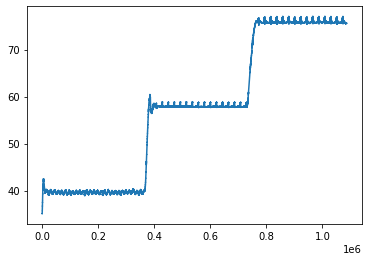

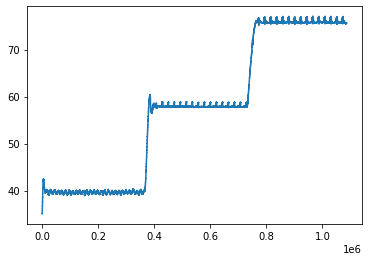

In [25]:
# Plot and save k1t
folder = DIR + '/data/pics/k1t/'
Path(folder).mkdir(parents=True, exist_ok=True)
for file in file_list:
    filename = file.split(os.sep)[-1][:-3]
    with h5py.File(file, "r") as h51:
        plt.figure()
        plt.plot(h51['k1t'])
        plt.savefig(folder + filename,facecolor='w')

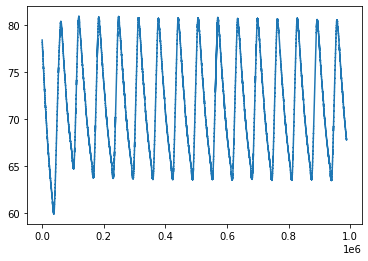

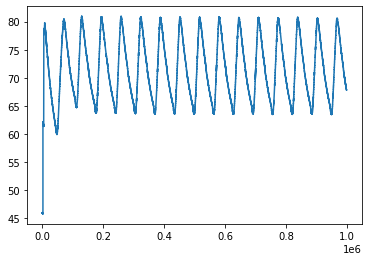

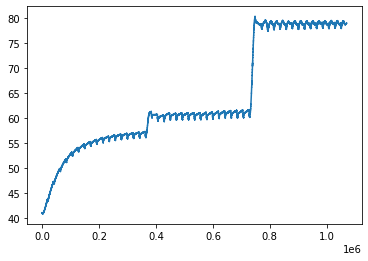

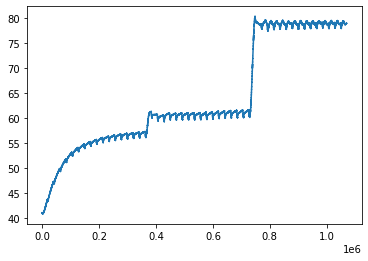

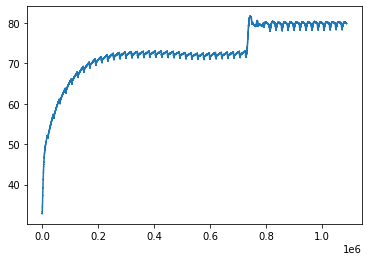

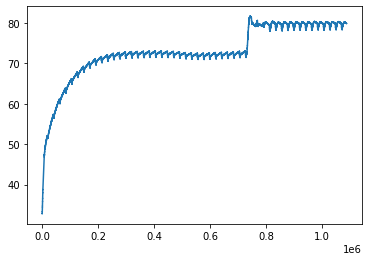

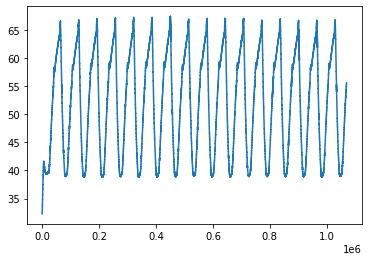

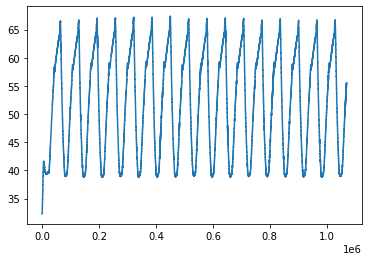

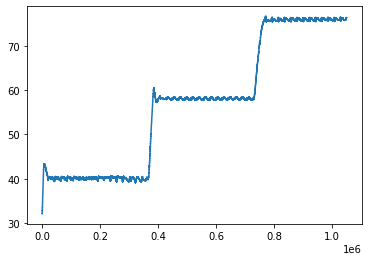

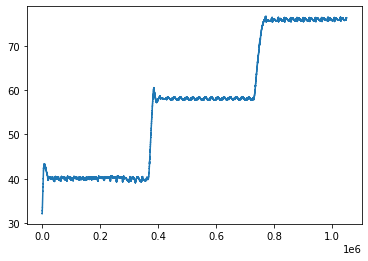

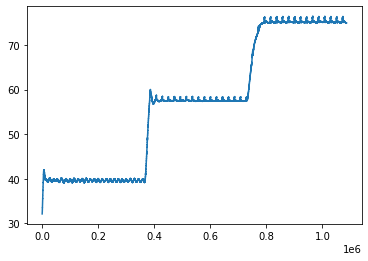

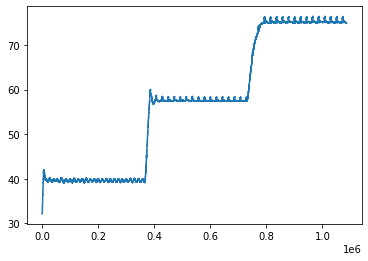

In [26]:
# Plot and save k2t
folder = DIR + '/data/pics/k2t/'
Path(folder).mkdir(parents=True, exist_ok=True)
for file in file_list:
    filename = file.split(os.sep)[-1][:-3]
    with h5py.File(file, "r") as h51:
        plt.figure()
        plt.plot(h51['k2t'])
        plt.savefig(folder + filename,facecolor='w')

## Check


see s21 diff with same pos, spd but different temp and pressure

In [3]:
file_list_LEM1

['C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\2_Phase_A-D\\20210127_Phase_A-D_LEM1.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\3_Phase_B-E\\20210201_3_Phase_B-E_LEM1.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\4_Phase_C-F\\20210202_4_Phase_C-F_LEM1.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\5_Phase_A-D\\20210218_5_Phase_A-D_LEM1.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\7_Phase_C-F\\20210218_7_Phase_C-F_LEM1.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\9_Phase_B-E\\9_Phase_B-E_LEM1.h5']

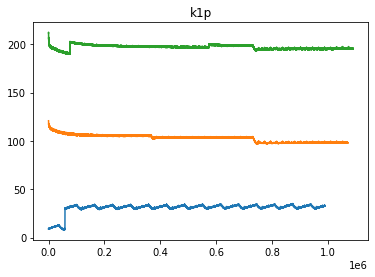

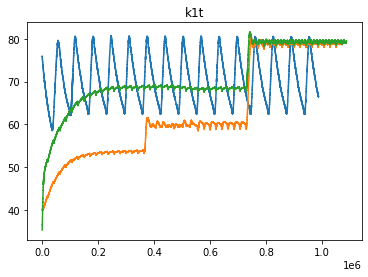

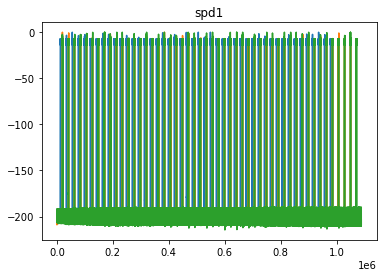

In [4]:
h5_30 = h5py.File(file_list_LEM1[0], "r")
h5_100 = h5py.File(file_list_LEM1[1], "r")
h5_200 = h5py.File(file_list_LEM1[2], "r")

def plot3(h51,h52,h53,key):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(key)
    ax.plot(h51[key])
    ax.plot(h52[key])
    ax.plot(h53[key])
plot3(h5_30,h5_100,h5_200,'k1p')
plot3(h5_30,h5_100,h5_200,'k1t')
plot3(h5_30,h5_100,h5_200,'spd1')

compare B-E and C-F due to similar temperature level

In [41]:
# only compare the data points with same temperature, approx. starts at F, see pic above
F = int(0.8*1e6)

# extract data
spd_100 = h5_100['spd1'][F:]
spd_200 = h5_200['spd1'][F:]
pos_100 = h5_100['pos1'][F:]
pos_200 = h5_200['pos1'][F:]

# trim and round
L = min(spd_100.shape[0], spd_200.shape[0])
spd_100 = np.round(spd_100[:L],decimals=2)
spd_200 = np.round(spd_200[:L],decimals=2)
pos_100 = np.round(pos_100[:L],decimals=2)
pos_200 = np.round(pos_200[:L],decimals=2)

pos_200.shape

(269740,)

In [42]:
# define starting point as the first point of the first lsa
f_100 = np.where(spd_100>-50)[0][0]
f_200 = np.where(spd_200>-50)[0][0]

In [43]:
# test N points starting from f_100 or f_200
N = 6000 # approx. half in lsa and half in hsa
pos_100 = pos_100[f_100:f_100+N]
pos_200 = pos_200[f_200:f_200+N]
spd_100 = spd_100[f_100:f_100+N]
spd_200 = spd_100[f_200:f_200+N]

pos_200.shape

(6000,)

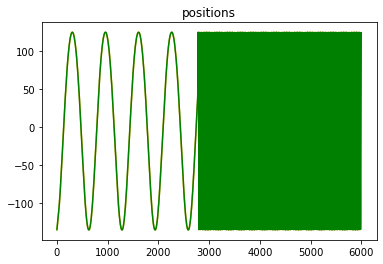

In [44]:
# compare the positions
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('positions')
ax.plot(pos_100,'orange')
ax.plot(pos_200,'green')

In [45]:
print("Mean Error of positions in mm:", np.mean(pos_100 - pos_200))
print("Mean Error of speeds in mm/s:",np.mean(spd_100 - spd_100))

Mean Error of positions in mm: -0.053591666666666586
Mean Error of speeds in mm/s: 0.0


In [46]:
# extract s21, ignore time sync cause only one lsa is extracted
s21_100 = np.array(h5_100['S21_P1_LEM1'][F+f_100:F+f_100+N,:])
s21_200 = np.array(h5_200['S21_P1_LEM1'][F+f_200:F+f_200+N,:])
s21_100.shape

(6000, 121)

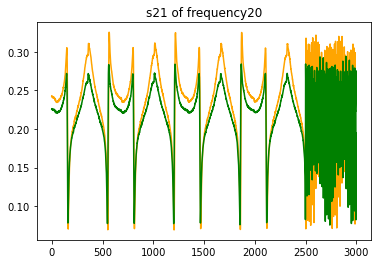

In [47]:
# plot of s21
fig = plt.figure()
freq = 20
ax = fig.add_subplot(1, 1, 1)
ax.set_title('s21 of frequency'+str(freq))
ax.plot(abs(s21_100[:3000,freq]),'orange') # time shift needed
ax.plot(abs(s21_200[:3000,freq]),'green')

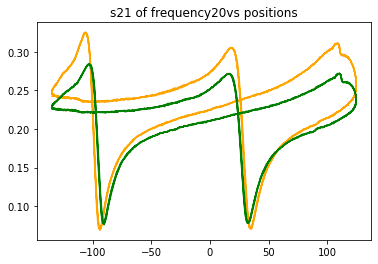

In [48]:
fig = plt.figure()
freq = 20
ax = fig.add_subplot(1, 1, 1)
ax.set_title('s21 of frequency'+str(freq)+'vs positions')
ax.plot(pos_100[:2000],abs(s21_100[:2000,freq]),'orange') # time shift needed
ax.plot(pos_200[:2000],abs(s21_200[:2000,freq]),'green')

In [49]:
mae = abs(np.mean(abs(s21_100-s21_200)))
re = mae/np.mean(abs(s21_100))
print("MAE(RE) of s21: {:.2f} ({:.2f}%)".format(mae,re*100))

MAE(RE) of s21: 0.08 (38.85%)
